🧾 BMW Dataset EDA Notebook Structure
1️⃣ Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load BMW dataset
df = pd.read_csv("bmw.csv")  # adjust file path if needed
df.head()


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


2️⃣ Dataset Info & Basic Checks

In [2]:
df.info()
df.describe(include='all')
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

3️⃣ Missing Values & Duplicates

In [3]:
df.isnull().sum()
df.duplicated().sum()



np.int64(0)

4️⃣ Data Cleaning

In [10]:
# Drop duplicates
df = df.drop_duplicates()


5️⃣ Univariate Analysis (Categorical Columns)

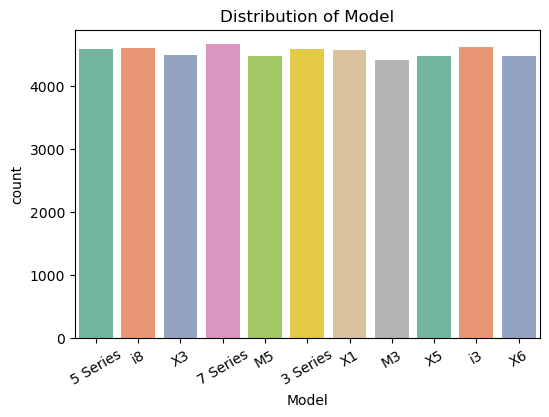

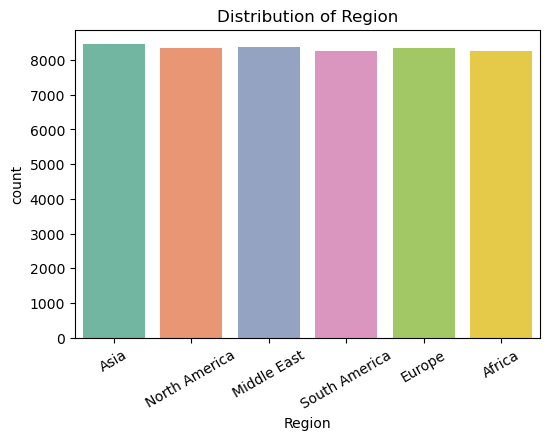

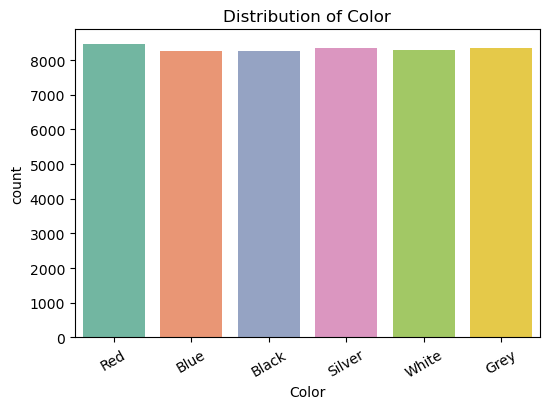

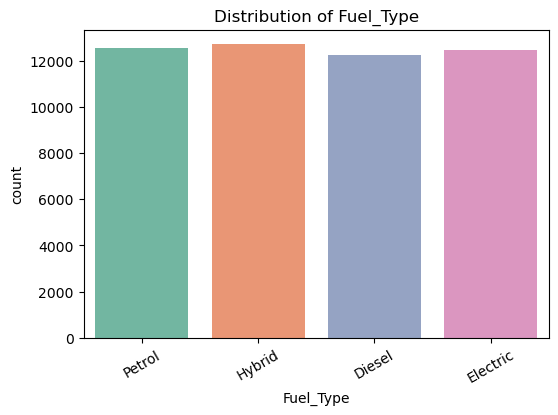

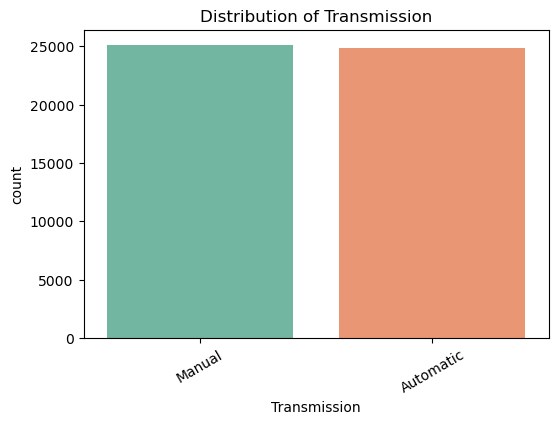

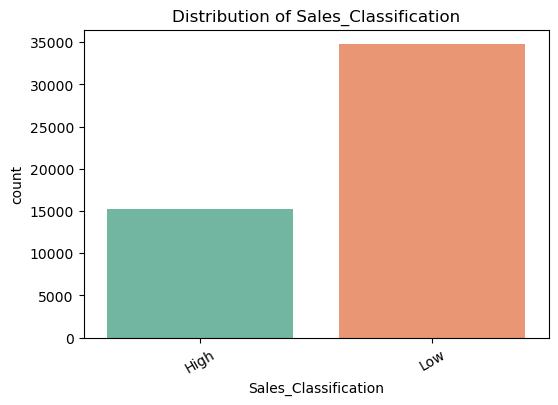

In [5]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, hue=col, palette='Set2', legend=False)  # warning-free
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
    plt.show()


6️⃣ Univariate Analysis (Numerical Columns)

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()


7️⃣ Bivariate Analysis (Boxplots)

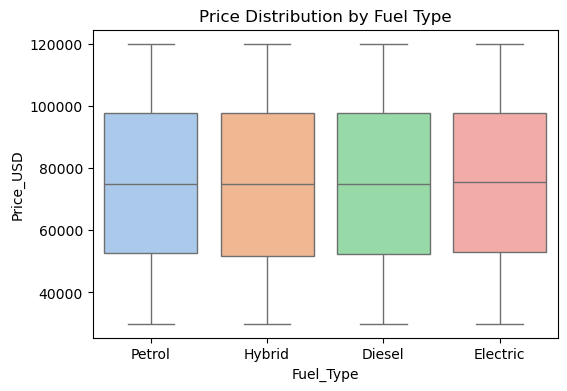

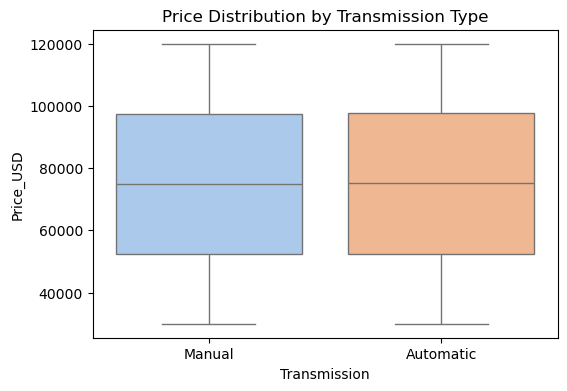

In [7]:
# Example: Price by Fuel Type
plt.figure(figsize=(6,4))
sns.boxplot(x='Fuel_Type', y='Price_USD', data=df, hue='Fuel_Type', palette='pastel', legend=False)
plt.title("Price Distribution by Fuel Type")
plt.show()

# Example: Price by Transmission
plt.figure(figsize=(6,4))
sns.boxplot(x='Transmission', y='Price_USD', data=df, hue='Transmission', palette='pastel', legend=False)
plt.title("Price Distribution by Transmission Type")
plt.show()


8️⃣ Correlation Heatmap

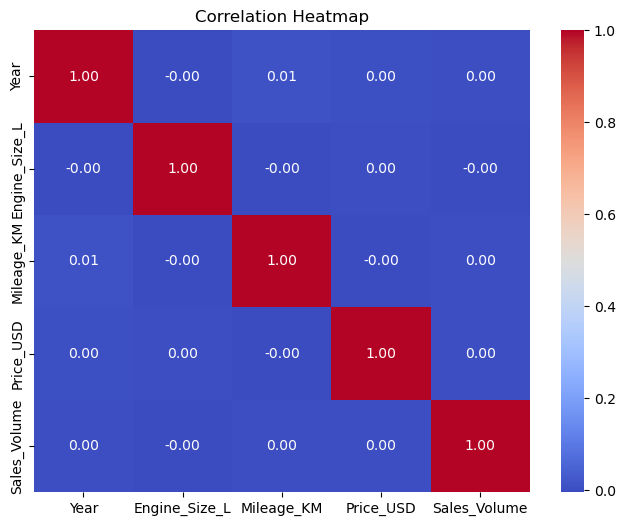

In [8]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


9️⃣ Save Cleaned Dataset

In [9]:
df.to_csv("BMW_cleaned.csv", index=False)
print("✅ Cleaned dataset saved successfully as 'BMW_cleaned.csv'")


✅ Cleaned dataset saved successfully as 'BMW_cleaned.csv'
